# CUSTOMER SEGMENTATION

***

## ONLINE RETAIL DATASET


<img src="https://img.freepik.com/free-vector/postman-giving-parcel-customer-post-office_74855-4811.jpg" width="626" height="250" >

At vero eos et accusamus et iusto odio dignissimos ducimus qui blanditiis praesentium voluptatum deleniti atque corrupti quos dolores et quas molestias excepturi sint occaecati cupiditate non provident, similique sunt in culpa qui officia deserunt mollitia animi, id est laborum et dolorum fuga. Et harum quidem rerum facilis est et expedita 

distinctio. Nam libero tempore, cum soluta nobis est eligendi optio cumque nihil impedit quo minus id quod maxime placeat facere possimus, omnis voluptas assumenda est, omnis dolor repellendus. Temporibus autem quibusdam et aut 

officiis debitis aut rerum necessitatibus saepe eveniet ut et voluptates repudiandae sint et molestiae non recusandae. Itaque earum rerum hic tenetur a sapiente delectus, ut aut reiciendis voluptatibus maiores alias consequatur aut perferendis doloribus asperiores repellat.

# FUNCTIONS

In [1]:
def set_chart_settings(title):
    
    plt.title(title)
    sns.despine(bottom = True, left = True)

# LIBS 

In [2]:
import pandas                   as pd
import seaborn                  as sns
import matplotlib.pyplot        as plt

import datetime

# DATASET

In [3]:
df = pd.read_csv('data.csv', encoding = 'latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

# DATA ANALYSIS 

## GENERAL ANALYSIS

In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')

In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.groupby('Country')['CustomerID'].count().sort_values(ascending = False)

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [9]:
df['Country'].value_counts(normalize = True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

***

More than 90% of the data is from UK sales, so, we're going to restrict the data to the United Kingdom only.


As we could see in the previous snippet, null customer ID represents 135.080 records. Our analysis is based on clients, so we're going to drop all missing values in this column as well.

In [10]:
df = df[df['Country'] == 'United Kingdom']

# removing null values
df = df[~df['CustomerID'].isnull()]

In [11]:
# checking negative values or incorrect dates
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

print(df['UnitPrice'].min())
print(df['UnitPrice'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00
0.0
38970.0


In [12]:
print(df['Quantity'].min(), df['Quantity'].max())
print(df[df['Quantity'] < 0].shape)
print(df.shape)

-80995 80995
(7533, 8)
(361878, 8)


***

As we can see, there're 7.533 negative values in quantity column. It's clear that're wrong numbers.
Before dropping them or replacing by other numbers, let's analyze some basic descriptive statistics.

In [13]:
df['Quantity'].describe()

count    361878.000000
mean         11.077029
std         263.129266
min      -80995.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [14]:
df[df['Quantity'] > 0].describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [15]:
df['Quantity'].value_counts().head(10)

1     71401
2     54798
12    49710
6     32181
4     28726
3     25159
24    19702
10    18446
8      9527
5      7707
Name: Quantity, dtype: int64

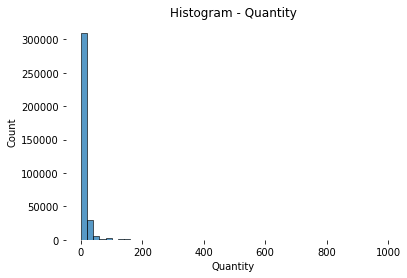

In [16]:
sns.histplot(data = df[(df['Quantity'] > 0) & (df['Quantity'] < 1000)], x = 'Quantity', bins = 50)
set_chart_settings('Histogram - Quantity')

In [17]:
print(df[df['Quantity'] < 0].shape[0],
df[df['Quantity'] > 100].shape[0],
df[df['Quantity'] > 500].shape[0],
df[df['Quantity'] > 600].shape[0],
df[df['Quantity'] > 1000].shape[0])

7533 3289 357 236 97


In [18]:
df[df['Quantity'] < 0]['Quantity'].value_counts().head(10)


-1     3331
-2     1115
-3      472
-12     409
-4      386
-6      366
-24     195
-5      159
-10     134
-8      129
Name: Quantity, dtype: int64

***

Negative values are pretty similar to positive ones. Looks like they were mistyped, so, as a faster solution, we're going to replace all negative values by positive values, using abs() function.

In [19]:
df['Quantity'] = df['Quantity'].apply(lambda x: abs(x) if x < 0
                    else x)

In [20]:
print(df['Quantity'].min(), df['Quantity'].max())
print(df[df['Quantity'] < 0].shape[0])
print(df.shape[0])

1 80995
0
361878


## DATA ANALYSIS

In [21]:
df1 = df.copy(deep = True)

***

We're going to create a revenue column:

Quantity sold * Unit Price

In [22]:
df1['revenue'] = df1['Quantity'] * df1['UnitPrice']
df1.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
498631,578531,22940,FELTCRAFT CHRISTMAS FAIRY,1,2011-11-24 14:40:00,4.25,17364.0,United Kingdom,4.25
166992,550964,23158,SET OF 5 LUCKY CAT MAGNETS,12,2011-04-21 16:48:00,2.08,15856.0,United Kingdom,24.96
425929,573340,21975,PACK OF 60 DINOSAUR CAKE CASES,2,2011-10-30 11:55:00,0.55,14159.0,United Kingdom,1.10
441043,574560,21262,WHITE GOOSE FEATHER CHRISTMAS TREE,6,2011-11-04 15:51:00,2.95,17703.0,United Kingdom,17.70
476581,577025,23491,VINTAGE JINGLE BELLS HEART,2,2011-11-17 12:54:00,8.25,16161.0,United Kingdom,16.50


***

From InvoiceDate column, we can create some features as day of the week, day name, whether is workday or not, periodof the day, holiday, etc.

In this notebook, we're going to create 3 more features, as following:

1 - Name of the day

2 - Workweek x weekend

4 - Day period

In [23]:
# "spliting" date and hour
df1['date'] = df1['InvoiceDate'].dt.date
df1['time'] = df1['InvoiceDate'].dt.time

In [24]:
# day of the week
df1['day_of_week'] = df1['InvoiceDate'].apply(lambda x: x.strftime('%A'))

In [25]:
# Saturday or sunday
df1['weekend'] = df1['day_of_week'].apply(lambda x: 1 if x == 'Saturday' or x == 'Sunday'
                        else 0)

In [26]:
# day period
print(df1['time'].min(), df1['time'].max())

now = datetime.datetime.now()
period = now.replace(hour=12, minute=0, second=0, microsecond=0)

# creating day period
df1['day_period'] = df1['InvoiceDate'].apply(lambda x: 'before_noon' if x.time() < period.time()
                                else 'after_noon')


06:10:00 20:38:00


In [27]:
# checking
print(df1[df1['day_period'] == 'before_noon']['time'].min())
print(df1[df1['day_period'] == 'before_noon']['time'].max())

print(df1[df1['day_period'] == 'after_noon']['time'].min())
print(df1[df1['day_period'] == 'after_noon']['time'].max())


06:10:00
11:59:00
12:00:00
20:38:00


## DATA VISUALIZATION

In [28]:
df2 = df1.copy(deep = True)

***

The final dataset in this section has 14 columns:

- 'InvoiceNo'
- 'StockCode'
- 'Description'
- 'Quantity'
- 'InvoiceDate',
- 'UnitPrice'
- 'CustomerID'
- 'Country'
- 'revenue'
- 'date'
- 'time',
- 'day_of_week'
- 'weekend'
- 'day_period'

To make this section easier, we're going to drop some of these columns, as follows:

1. **InvoiceNo**: we don't need this information for the purpose of this analysis

2. **StockCode**: No information for the purpose of this analysis

3. **Description**: The description column could be a good information, but for now, we're going to focus on others variables that don't need so much cleaning.

4. **InvoiceDate**: We've created some other features based on this column, so, we no longer need this variable anymore.

5. **Country**: It's all about United Kingdom, so, no need this column either.



In [29]:
cols = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
df2 = df2.drop(columns=(cols))

In [30]:
df2.head()

,Quantity,UnitPrice,CustomerID,revenue,date,time,day_of_week,weekend,day_period
0,6,2.55,17850.0,15.30,2010-12-01,08:26:00,Wednesday,0,before_noon
1,6,3.39,17850.0,20.34,2010-12-01,08:26:00,Wednesday,0,before_noon
2,8,2.75,17850.0,22.00,2010-12-01,08:26:00,Wednesday,0,before_noon
3,6,3.39,17850.0,20.34,2010-12-01,08:26:00,Wednesday,0,before_noon
4,6,3.39,17850.0,20.34,2010-12-01,08:26:00,Wednesday,0,before_noon


### Quantity

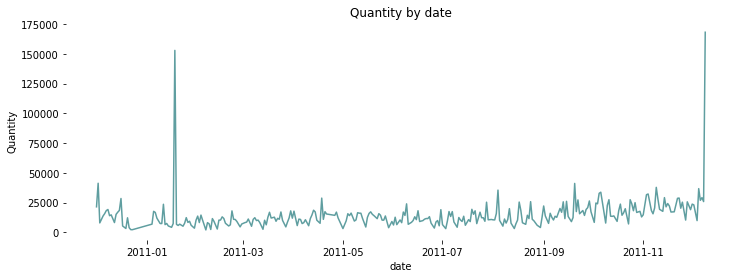

In [31]:
plt.figure(figsize = (12,4))

ax = sns.lineplot(data = df2[['date', 'Quantity']].groupby('date', as_index= False).sum(),  x = 'date',
                  y ='Quantity',
                 color = 'cadetblue')
set_chart_settings('Quantity by date')

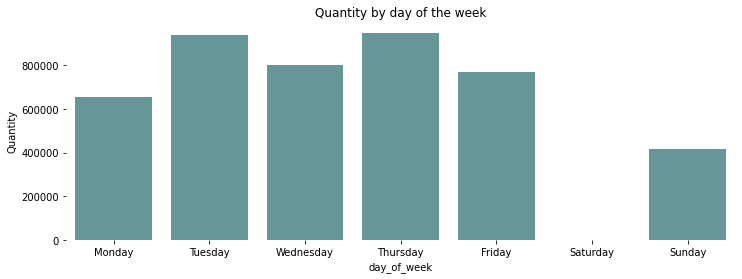

In [32]:
plt.figure(figsize = (12,4))

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(data = df2[['day_of_week', 'Quantity']].groupby('day_of_week', as_index= False).sum(),  x = 'day_of_week',
                 y ='Quantity',
                color = 'cadetblue',
                order = order)
set_chart_settings('Quantity by day of the week')

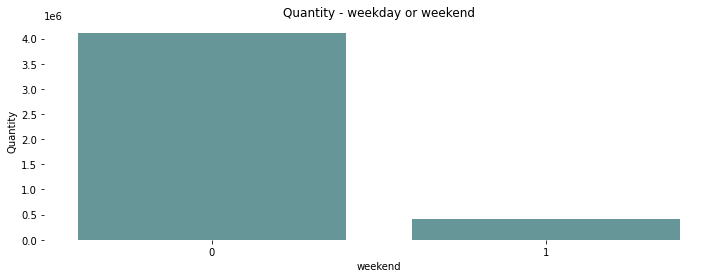

In [33]:
plt.figure(figsize = (12,4))


ax = sns.barplot(data = df2[['weekend', 'Quantity']].groupby('weekend', as_index= False).sum(),
                 x = 'weekend',
                 y ='Quantity',
                color = 'cadetblue',
)
set_chart_settings('Quantity - weekday or weekend')

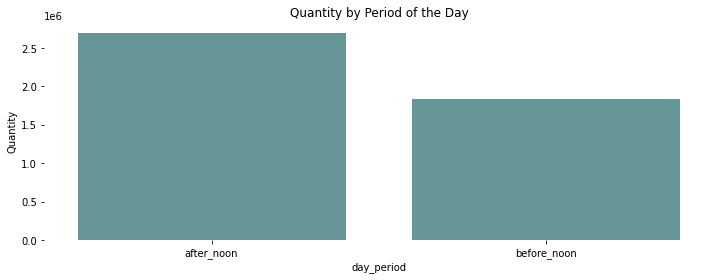

In [34]:
plt.figure(figsize = (12,4))


ax = sns.barplot(data = df2[['day_period', 'Quantity']].groupby('day_period', as_index= False).sum(),
                 x = 'day_period',
                 y ='Quantity',
                color = 'cadetblue',
)
set_chart_settings('Quantity by Period of the Day')